# EDA. Interactive visualizations

Дані взяті зі [змагання](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на Kaggle. Набір даних містить ціни на будинки в місті Еймс штату Айова. 

Цей набір даних має багато ознак – все як у реальному житті. І ми будемо аналізувати закономірності у цьому наборі даних.

In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

1. Завантажимо `train.csv` у змінну `df_train`.

In [68]:
df_train = pd.read_csv(r"C:\Data\train.csv")
print(df_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [69]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Виведемо інформацію про колонки у наборі даних, їх типах, кількості **не** null значень у кожній колонці та формі набору даних.

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [71]:
df_train.shape

(1460, 81)

3. Задача, яку ми розглядаємо – це задачі регресії. Наша цільова змінна – `SalePrice`. І у задачі регресії потрібно буде її передбачити. Нам важливо зрозуміти, як вона розподілена та як взаємодіє з іншими змінними.
Найкраще моделюються змінні, близькі до нормального розподілу.

3.1. Побудуємо функцію щільності (розподіл даних) `SalePrice` за допомогою `seaborn`.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

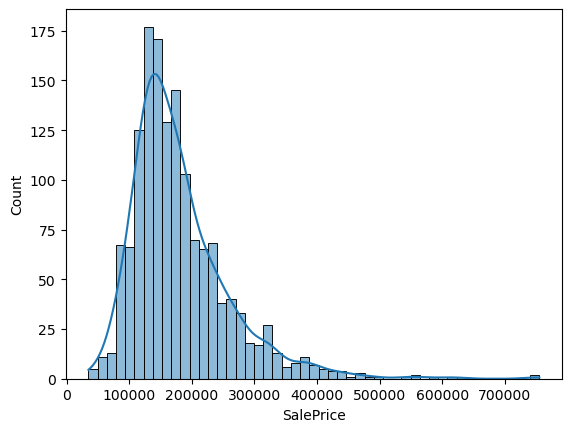

In [72]:
sns.histplot(data=df_train, x='SalePrice', kde=True)

3.2. Виведемо асиметрію та ексцес (на англ. - skewness and kurtosis) для `SalePrice` .

In [73]:
from scipy.stats import kurtosis, skew
skew = skew(df_train['SalePrice'])
kurt = kurtosis(df_train['SalePrice'])
print(f"Skewness of SalePrice variable is {round(skew, 3)}, kurtosis is {round(kurt, 3)}")

Skewness of SalePrice variable is 1.881, kurtosis is 6.51


Бачимо, що змінну зміщено. 

4. Побудуємо матрицю кореляції, яка міститиме цільову змінну `SalePrice` і усі **числові**. Відобразимо її у вигляді теплової картки.

<AxesSubplot:title={'center':'Correlation matrix'}>

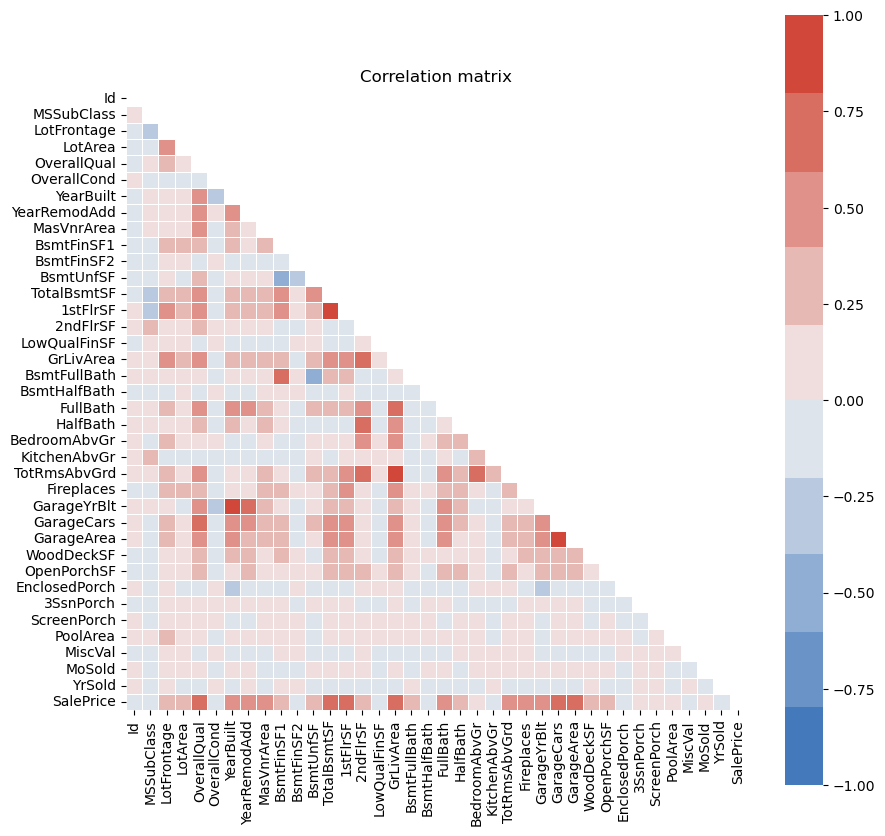

In [77]:
numeric_columns = df_train.select_dtypes(include=["int64", "float64"]).columns
corr = df_train[numeric_columns].corr()
plt.figure(figsize=(10,10))
plt.title("Correlation matrix")
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(250, 15, n=10)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, vmin=-1, vmax=1)

In [78]:
#проаналізуємо кореляцію з цільовою змінною
sp_corr = corr[["SalePrice"]].sort_values(by="SalePrice", ascending=False)
#видалимо кореляцію цільової змінною з самою собою
sp_corr = sp_corr[sp_corr.index != "SalePrice"]

<AxesSubplot:title={'center':'Correlation with Sale Price'}>

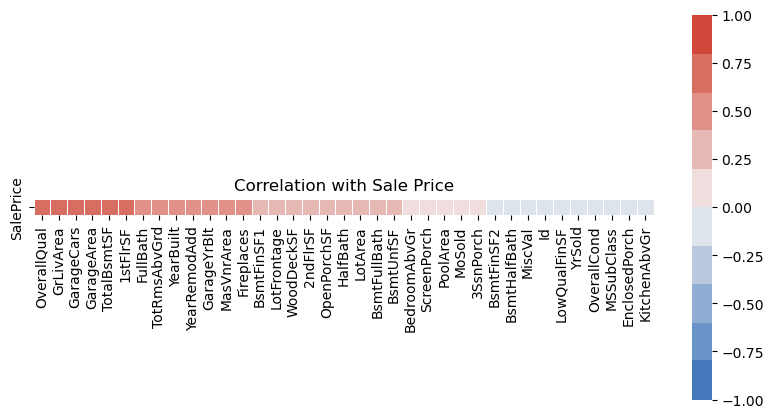

In [79]:
plt.figure(figsize=(10,5))
plt.title("Correlation with Sale Price")
sns.heatmap(sp_corr.transpose(), cmap=cmap, center=0, square=True, linewidths=.5, vmin=-1, vmax=1)

В даному випадку досить багато змінних мають позитивну кореляцію з цільовою змінною. Це вказує на пряму лінійну залежність. Негативно на ціну не впливає жодна фіча.

4.1. Знайдемо топ 10 змінних (не включаючи саму `SalePrice`), з якими `SalePrice` має найбільшу позитивну кореляцію. Виведемо ці змінні та кореляцію з ними.

In [80]:
sp_corr.head(10)

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


4.2. Побудуємо теплову карту кореляцій тільки серед змінних `SalePrice` та топ 10, що корелюють із нею. 

<AxesSubplot:title={'center':'Correlation matrix'}>

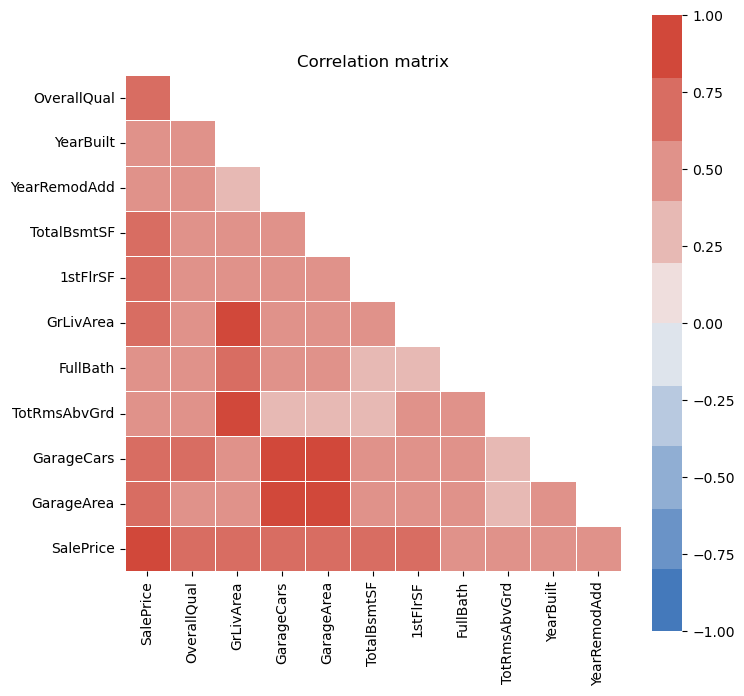

In [82]:
top_features = corr[["SalePrice"]].sort_values(by="SalePrice", ascending=False).head(11).index
corr_top = corr[corr.index.isin(top_features)][top_features]

plt.figure(figsize=(8,8))
plt.title("Correlation matrix")
mask = np.triu(np.ones_like(corr_top, dtype=bool), k=1)
cmap = sns.diverging_palette(250, 15, n=10)
sns.heatmap(corr_top, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, vmin=-1, vmax=1)

5. Побудуємо трикутний pairplot для SalePrice і топ 10 ознак у наборі даних, що корелюють з нею. Додамо лінії тренду до даних (параметр kind). По діагоналі виведемо kernel density estimation (kde) змінних.

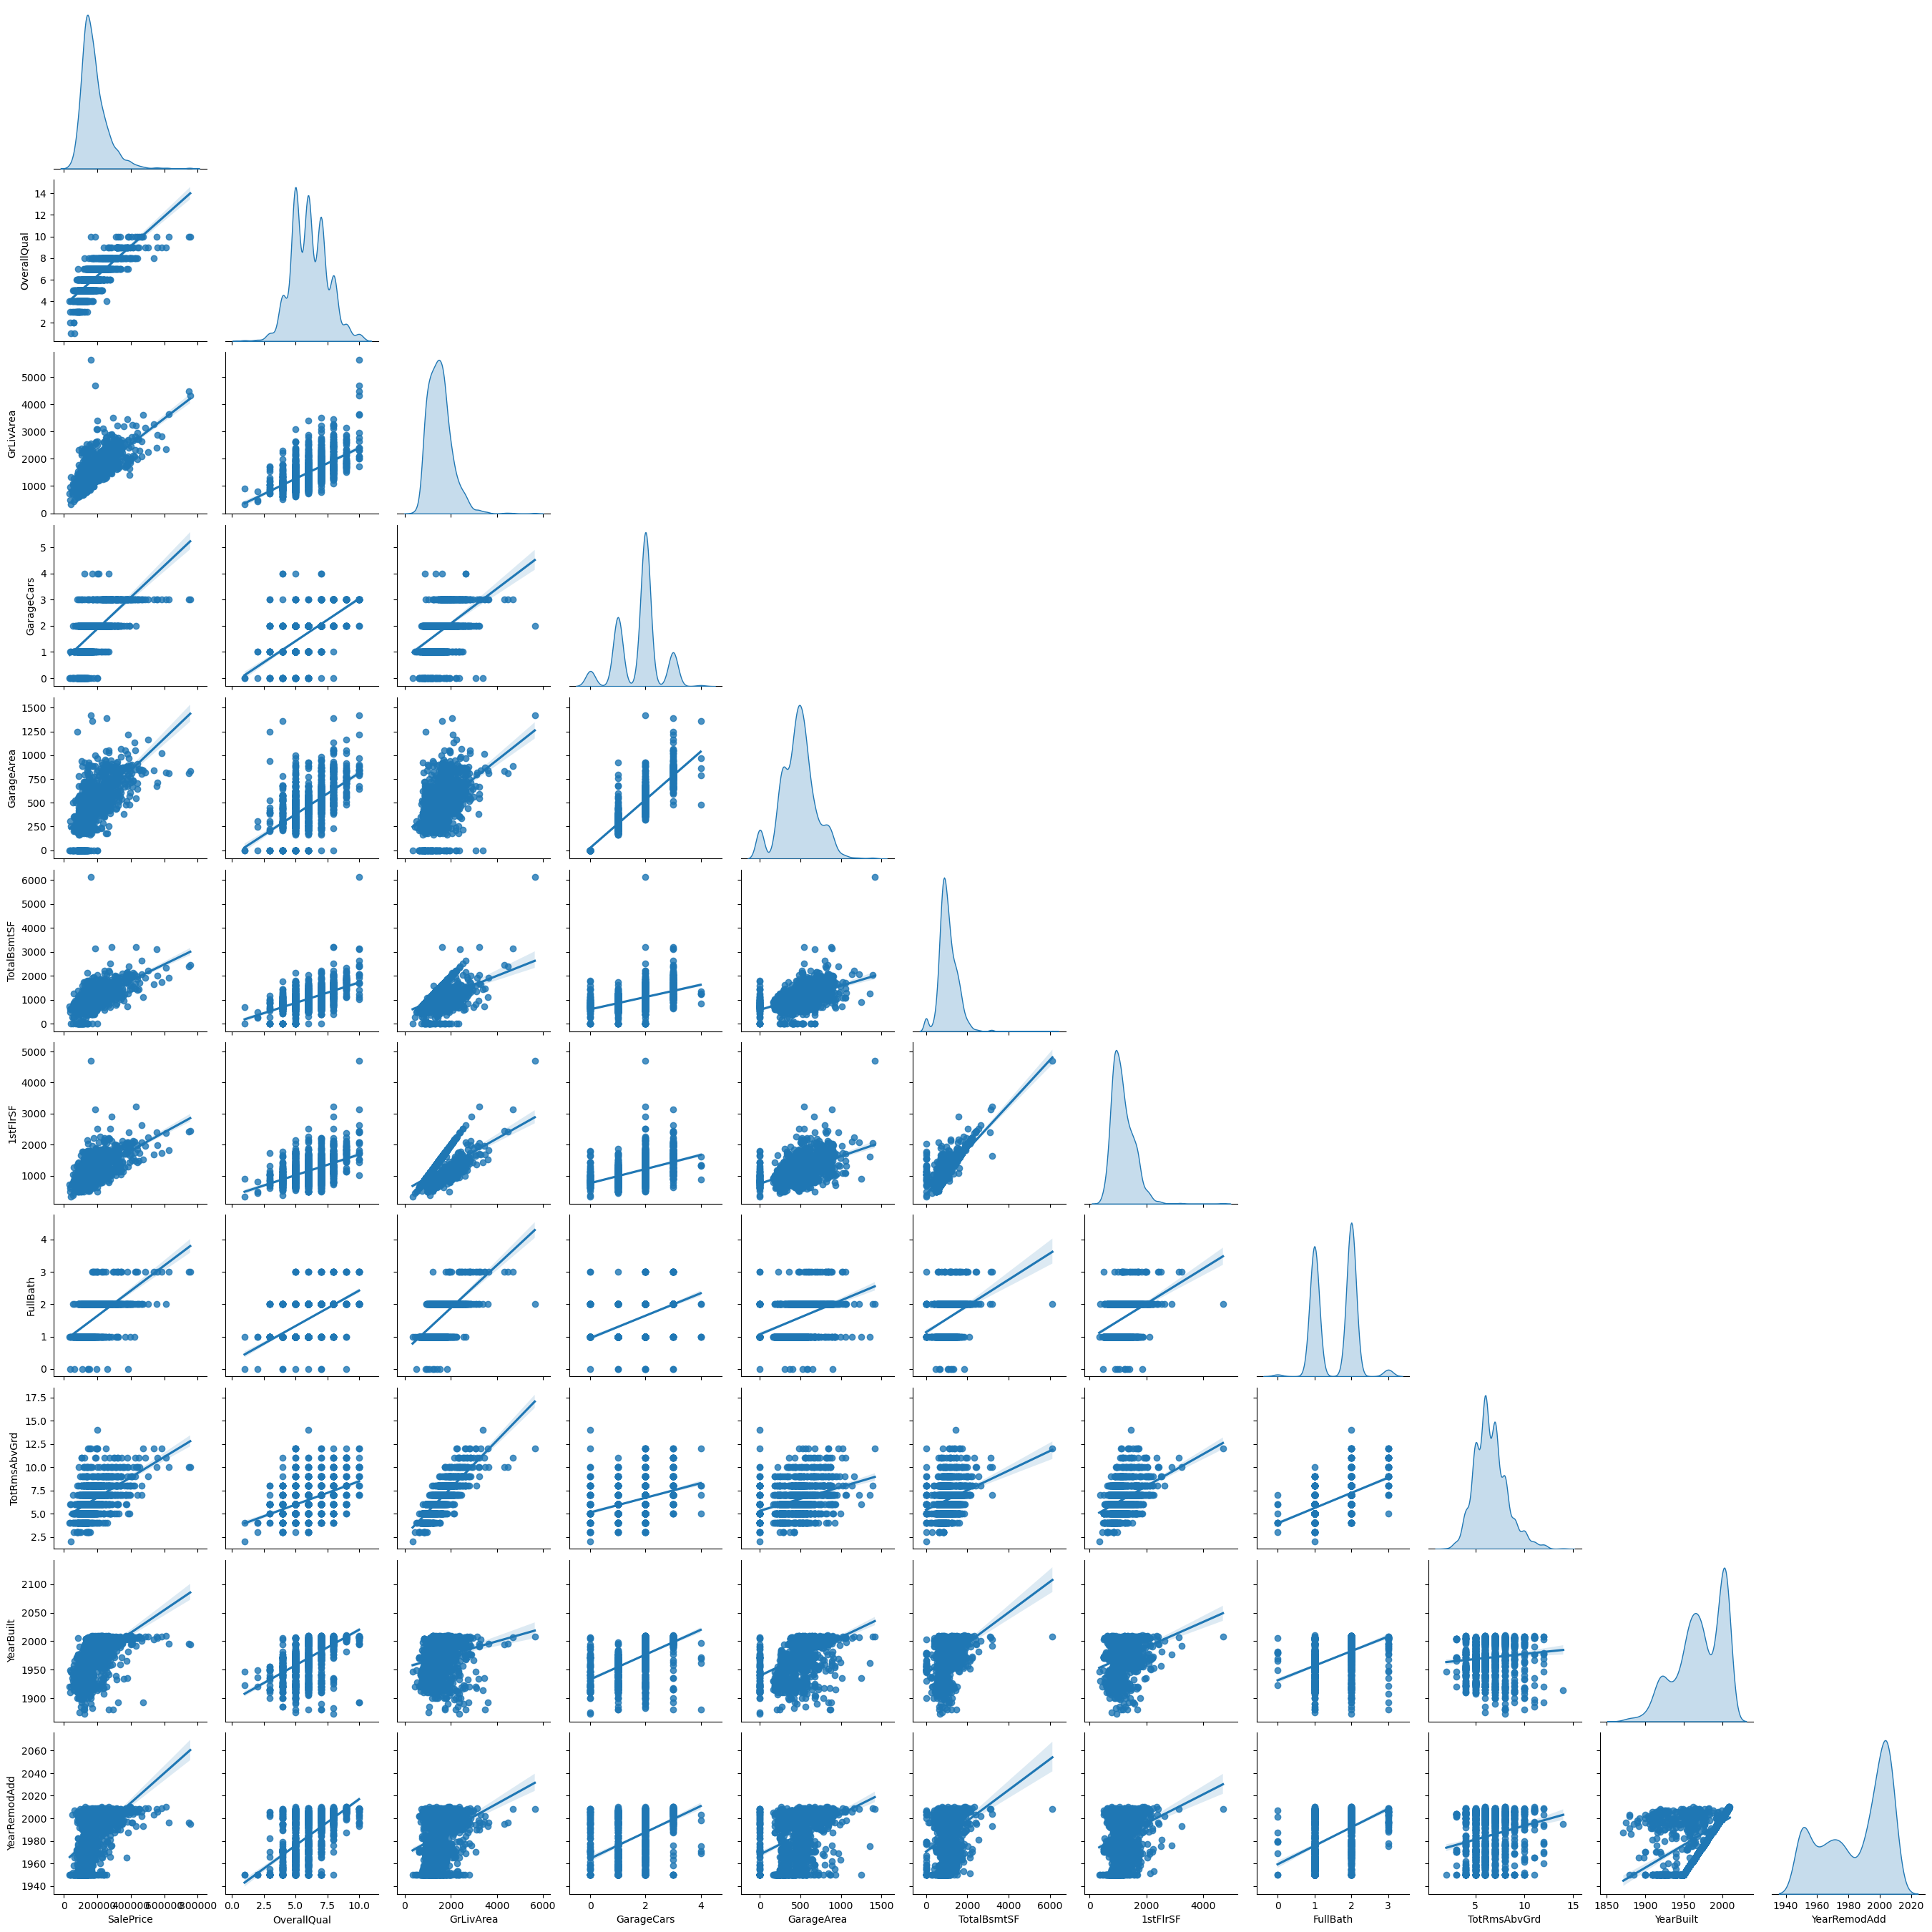

In [83]:
df_top_feat = df_train[top_features]
sns.pairplot(df_top_feat, corner=True, kind='reg', diag_kind='kde')

Ми можемо бачити точки, які начебто не потрапили до загального кластеру. Їх називають аутлаєрами (з англ. outliers) або викидами. Такими є, наприклад, точки з невисокою `SalePrice` і при цьому високе значення `GrLivArea`, або точка зі значенням `TotalBsmtSF` близько 6000 і при цьому низьким `SalePrice`.

5.1. Виведемо крапки з `GrLivArea` строго більше 4000.

In [85]:
df_train[df_train['GrLivArea'] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


5.2. Не всі колонки помістилися при виведенні. Встановимо параметр `display.max_columns` рівний 100. І виведемо дані в п.5.1, ще раз, щоб було зручно аналізувати дані.

In [86]:
display.max_columns = 100
df_train[df_train['GrLivArea'] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


5.3. Так чим же відрізняються точки з обраних, у яких низька ціна (менше 200000) від тих, у яких ціна висока (більше 700000)?

In [87]:
outliers = df_train[df_train['GrLivArea'] > 4000]
cols_to_drop = [col for col in outliers.columns if len(outliers[col].unique()) == 1]
outliers = outliers.drop(cols_to_drop,axis=1)
print(f"{len(cols_to_drop)} колонок мають однакові значення, а отже не є причиною високої/низької ціни аутлаєрів")

34 колонок мають однакові значення, а отже не є причиною високої/низької ціни аутлаєрів


In [88]:
outliers

,Id,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,OverallCond,...,WoodDeckSF,OpenPorchSF,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,130.0,40094,IR1,Bnk,Inside,Edwards,PosN,PosN,5,...,208,406,0,NaN,NaN,10,2007,New,Partial,184750
691,692,104.0,21535,IR1,Lvl,Corner,NoRidge,Norm,Norm,6,...,382,50,0,NaN,NaN,1,2007,WD,Normal,755000
1182,1183,160.0,15623,IR1,Lvl,Corner,NoRidge,Norm,Norm,5,...,171,78,555,Ex,MnPrv,7,2007,WD,Abnorml,745000
1298,1299,313.0,63887,IR3,Bnk,Corner,Edwards,Feedr,Norm,5,...,214,292,480,Gd,NaN,1,2008,New,Partial,160000


1.Neighborhod. Бачимо, що два дорожчі будинки знаходяться в районі Corner, а дешевші в районі NoRidge. Це може пояснити таку різницю в ціні
2.LandContour. Показує наскільки рівною є поверхня, де розташований будинок. Очевидно, що з районом це теж має звʼязок.     
3.YearBuilt. Бачимо, що дорожчі будинки є новішими.                                                                         
4.Condition1: Близькість до основної дороги, в дорожчих будинків вона Norm.

Гіпотез може бути більше.

5.4. Побудуємо діаграму розсіювання, в якій по осі ОХ - `Condition1`, по осі ОУ - `SalePrice`.

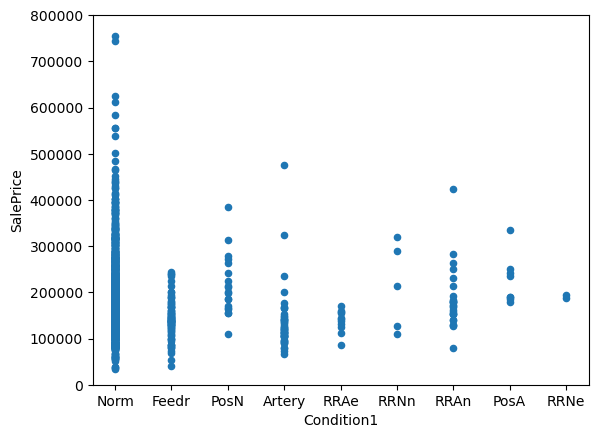

In [50]:
data = pd.concat([df_train['SalePrice'], df_train['Condition1']], axis=1)
data.plot.scatter(x='Condition1', y='SalePrice', ylim=(0,800000))
plt.show()

Для дому з Id=1299 ми могли б обґрунтувати низьку ціну тим, що вона має параметр Condition1=FeedR (точки з цим параметром зазвичай мають нижчу ціну), а ось з Id=524 Condition1 = PosN навряд чи негативно впливає на ціну, швидше навпаки. Схоже, причина низької ціни цих будинків - інша. 

5.5. Побудуємо діаграму розсіювання, в якій по осі ОХ - Neighborhood, по осі ОУ - SalePrice.

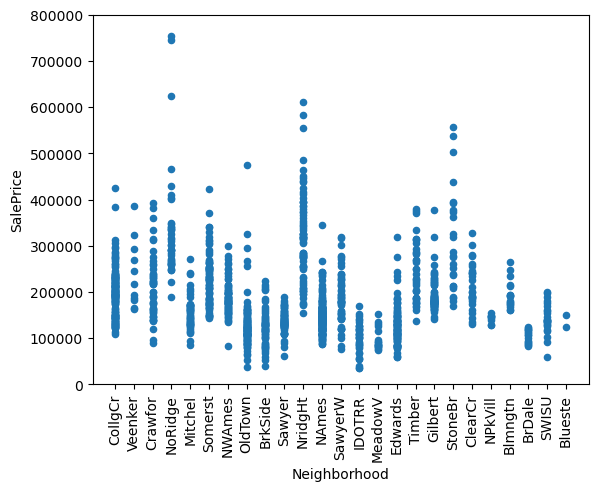

In [54]:
data = pd.concat([df_train['SalePrice'], df_train['Neighborhood']], axis=1)
data.plot.scatter(x='Neighborhood', y='SalePrice', ylim=(0,800000))
plt.xticks(rotation = 90)
plt.show()

Виведемо mean, std, min, max, mode значення `SalePrice` для різних значень Neighborhood. 

In [55]:
df_train_des=df_train.groupby('Neighborhood')['SalePrice'].describe().sort_values('mean', ascending=False)
df_train_des.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
NoRidge,41.000000,335295.317073,121412.658640,190000.000000,265000.000000,301500.000000,341000.000000,755000.000000
NridgHt,77.000000,316270.623377,96392.544954,154000.000000,253293.000000,315000.000000,374000.000000,611657.000000
StoneBr,25.000000,310499.000000,112969.676640,170000.000000,213500.000000,278000.000000,377426.000000,556581.000000
Timber,38.000000,242247.447368,64845.651549,137500.000000,186900.000000,228475.000000,286115.750000,378500.000000
Veenker,11.000000,238772.727273,72369.317959,162500.000000,184250.000000,218000.000000,282000.000000,385000.000000
Somerst,86.000000,225379.837209,56177.555888,144152.000000,177975.000000,225500.000000,252919.500000,423000.000000
ClearCr,28.000000,212565.428571,50231.538993,130000.000000,183750.000000,200250.000000,242225.000000,328000.000000
Crawfor,51.000000,210624.725490,68866.395472,90350.000000,159250.000000,200624.000000,239000.000000,392500.000000
CollgCr,150.000000,197965.773333,51403.666438,110000.000000,152958.750000,197200.000000,225725.000000,424870.000000


6. Схоже будинки  Id=524 та Id=1299 мають neighborhood, у якому ціни будинків низькі. Цим можливе й обґрунтовується ціна. Але це лише гіпотеза.

6.1. За допомогою бібліотеки `missingno` виведемо у вигляді bar chart кількість відсутніх значень у колонках датасету. Щоб переглядати було комфортно, виведемо на одній фігурі дві панелі розташовані вертикально (тобто друга під першою), де на першій панелі буде інформація про відсутні значення у перших 40 колонках, а на другій - у всіх інших.

In [56]:
!pip install missingno
import missingno as msno

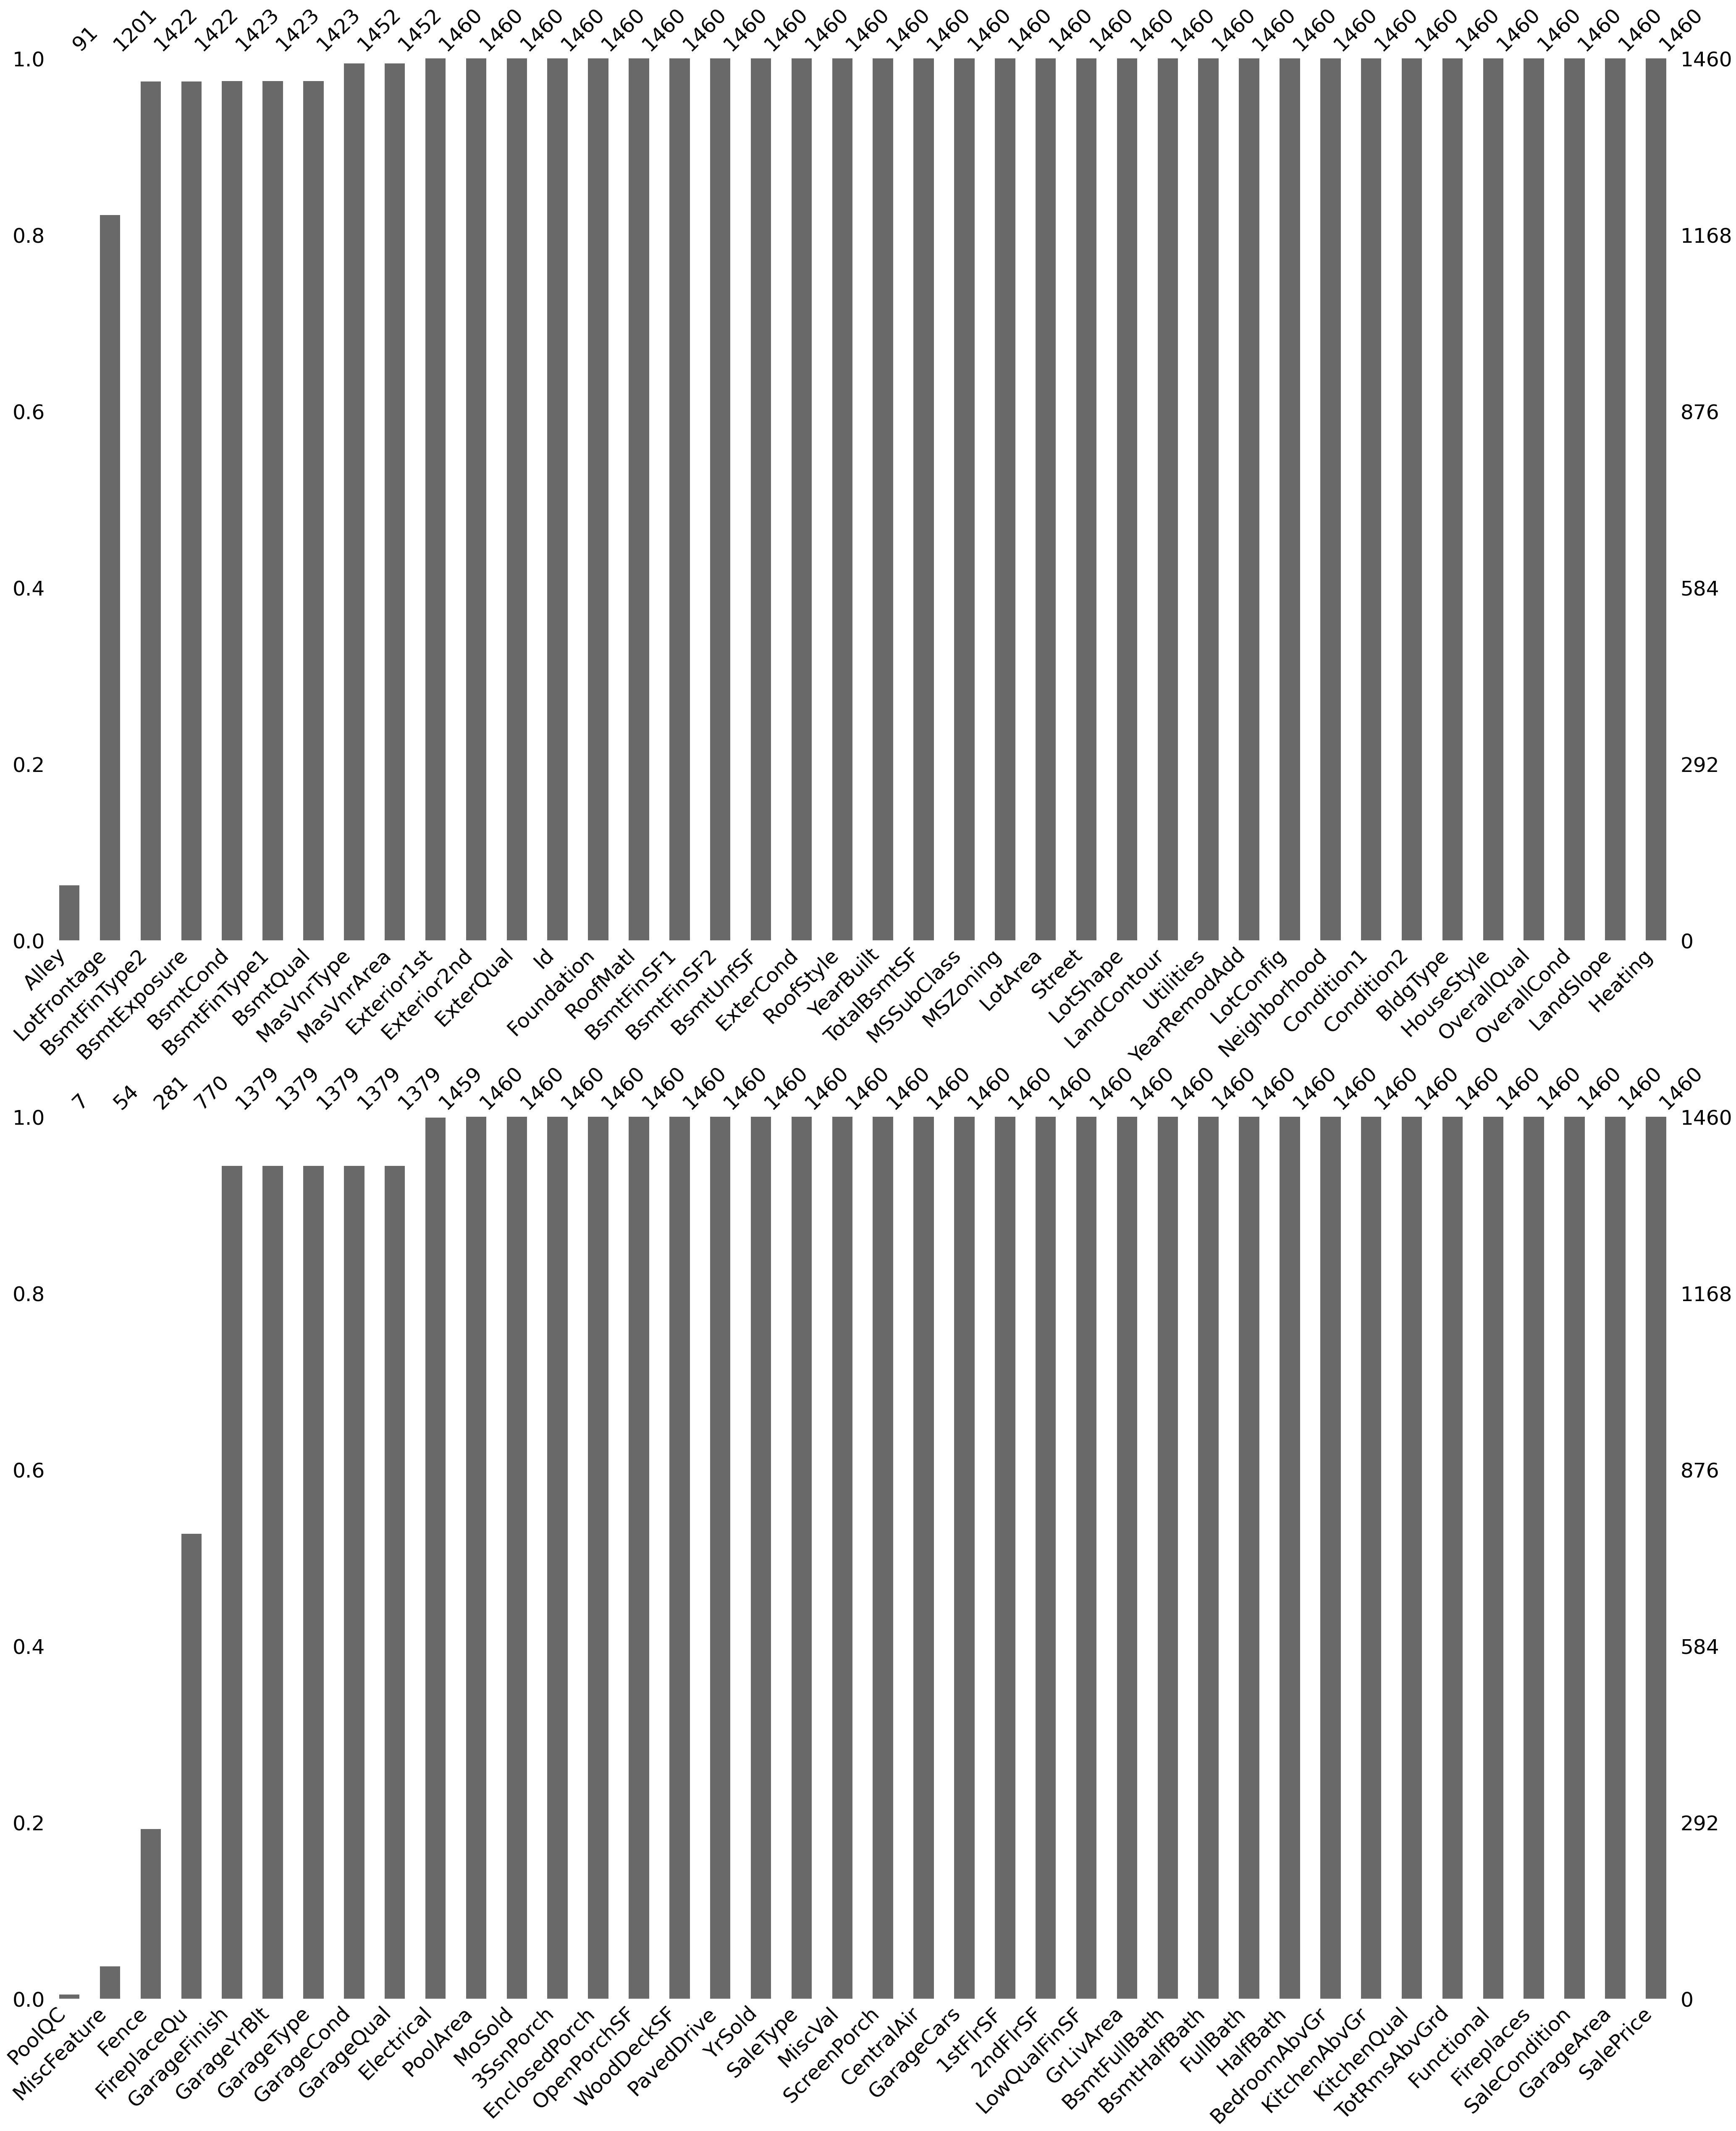

In [89]:
fig = plt.figure(figsize=(50, 60))

ax1 = fig.add_subplot(2,1,1)
msno.bar(df_train.iloc[:, :40], fontsize=35, sort="ascending", ax=ax1)

ax2 = fig.add_subplot(2,1,2)
msno.bar(df_train.iloc[:, 41:], fontsize=35, sort="ascending", ax=ax2)

plt.show()

6.2. В колонках Alley, PoolQC, MiscFeature, Fence немає більше половини записів. 

6.2.1. Проведемо подібний аналіз не візуально, а аналітично, щоб могли вибрати те, що нам зручніше.
Порахуємо, скільки значень відсутні в кожній колонці датафрейму `df_train`.

In [90]:
nan = (df_train.isna().sum() / len(df_train)) * 100
nan = nan.drop(nan[nan == 0].index).sort_values(ascending=False)
count_na1 = pd.DataFrame({'Missing %' :nan})
count_na1

,Missing %
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [91]:
count_na = df_train.isna().sum().sort_values(ascending=False)
count_na

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

6.2.2. Користуючись змінною `count_na`, виведемо колонки, у яких відсоток відсутніх значень строго більше 50. 

In [92]:
count_na[count_na > (df_train.shape[0]/2)]

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
dtype: int64

6.3. Виведемо матричне відображення відсутніх значень за допомогою бібліотеки missingno. Знайдемо, яка максимальна кількість заповнених даних в одному рядку і яка мінімальна. Кількість заповнених даних на одному рядку обмежена зверху кількістю колонок.

<AxesSubplot:>

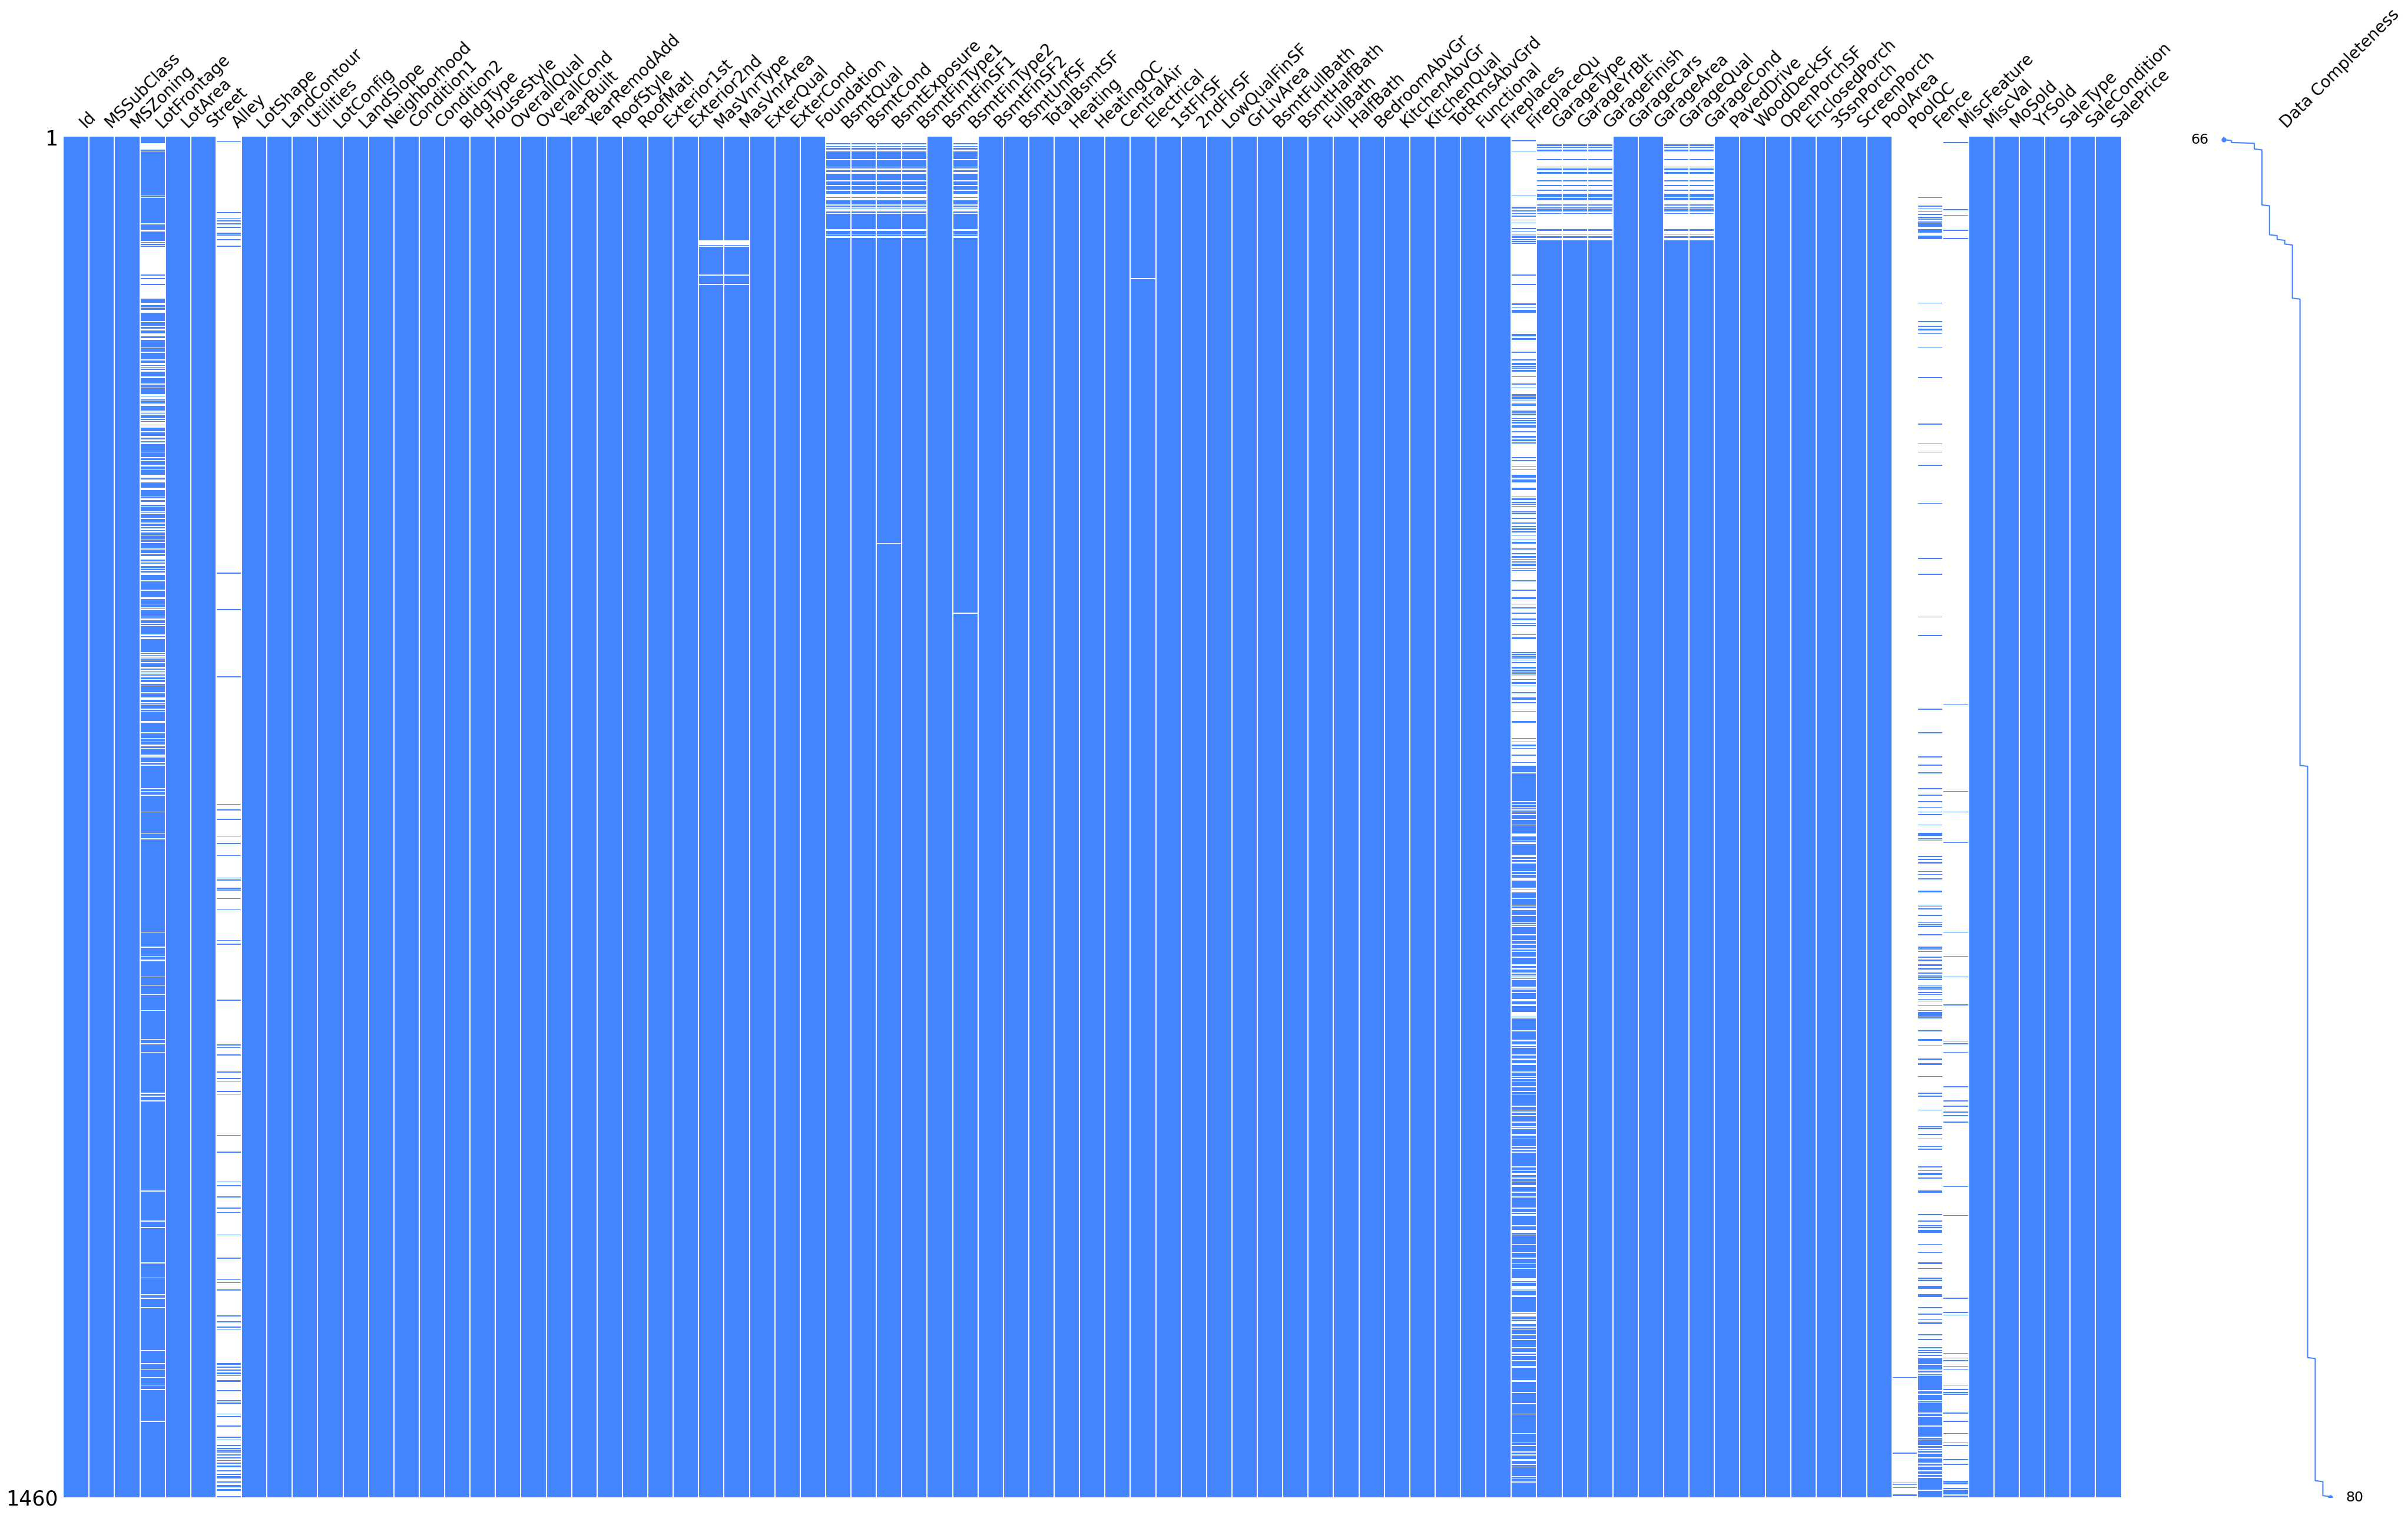

In [93]:
msno.matrix(df_train, labels=True, figsize=(50,30), fontsize=20, sort="ascending", color=(0.27, 0.52, 1.0))

Максимальная кількість заповнених даних в рядку - 80 (колонок в датафреймі 81, а отже в нас нема жодного рядка з усіма заповненими фічами), мінімальна - 66

6.4. Виведемо теплову картку відсутніх значень за допомогою бібліотеки `missingno`.  

<AxesSubplot:>

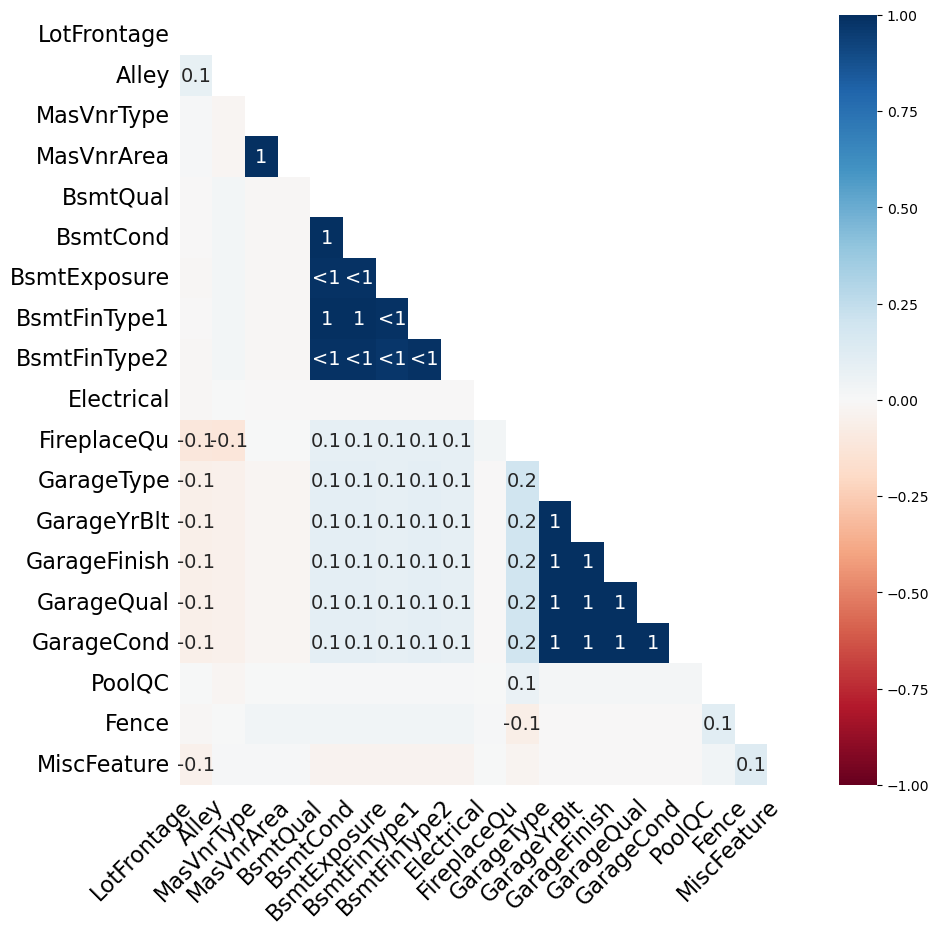

In [94]:
msno.heatmap(df_train, figsize=(10,10))

Якщо будуть відсутні значенні в змінній GarageType, пропущенні значення будуть також в GarageYrBlt, GarageQual, GarageFinish, GarageCond, що є логічним, бо всі ці фічі повʼязані з гаражем